# Análise de Dados - Startups Unicórnios

Esse presente trabalho tem como objetivo realizar insights acerca de empresas que alcançaram 1 bilhão de dólares. Foram, portanto, realizando várias análises dos mais diversos estilos.

In [ ]:
#importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#ler os dados
Base_Dados= pd.read_csv('Startups+in+2021+end.csv')

#Verificar Dimensão
Base_Dados.shape

(936, 8)

In [ ]:
#Primeiros Registros
Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# Colunas
Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [ ]:
#Renomear
Base_Dados.rename( columns ={
    'Unnamed: 0' : 'id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($B)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace = True)

In [ ]:
# Verificar tipo da informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($B)      936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
#Verificar campos nulos
Base_Dados.isnull().sum()

,0
id,0
Empresa,0
Valor ($B),0
Data de Adesão,0
País,0
Cidade,15
Setor,0
Investidores,1


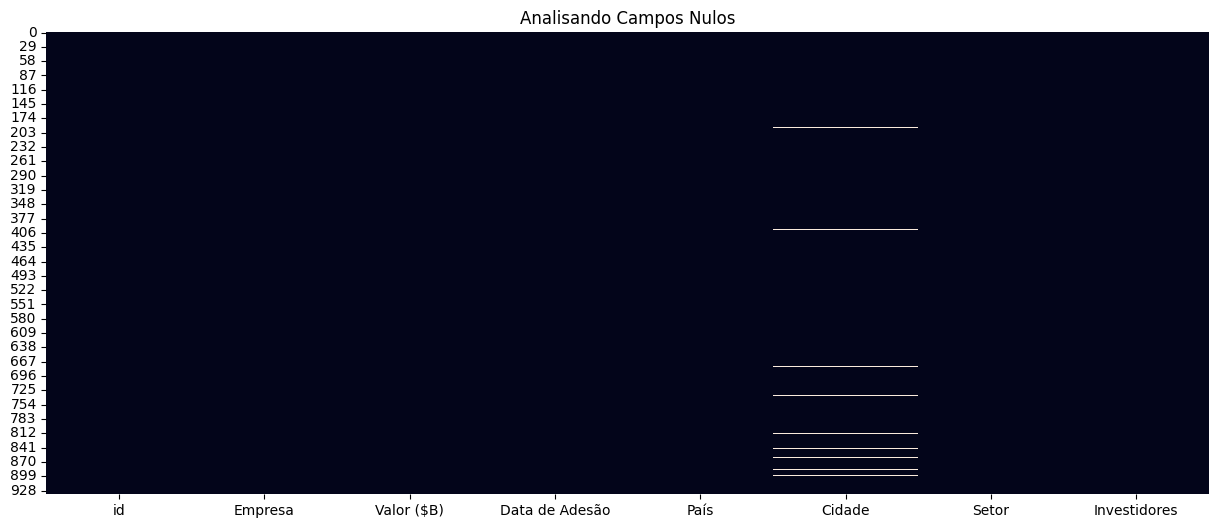

In [ ]:
# Grafica
plt.figure(figsize=(15,6))
plt.title('Analisando Campos Nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False);

In [ ]:
#Campos unicos
Base_Dados.nunique()

,0
id,936
Empresa,935
Valor ($B),192
Data de Adesão,589
País,47
Cidade,239
Setor,17
Investidores,920


In [ ]:
#Valores Únicos nunique() retornaria apenas a quantidade
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [ ]:
#Valores Únicos - Rank
#value_counts(normalize=True) retornará em proporção
Base_Dados['Setor'].value_counts()

,count
Setor,
Fintech,190
Internet software & services,167
E-commerce & direct-to-consumer,102
Artificial intelligence,69
Health,63
"Supply chain, logistics, & delivery",51
Other,51
Cybersecurity,41
Mobile & telecommunications,37


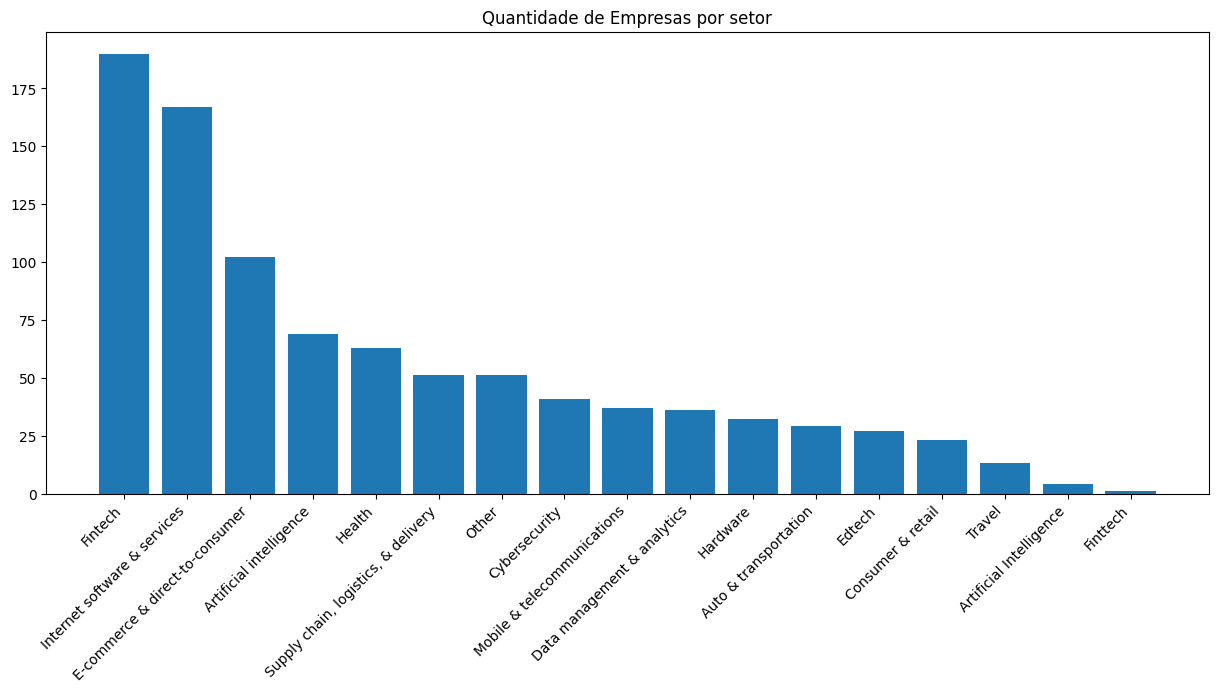

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Quantidade de Empresas por setor')
plt.xticks(rotation=45,ha='right')
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts());

In [ ]:
Analise = round(Base_Dados['País'].value_counts(normalize=True) * 100, 2)

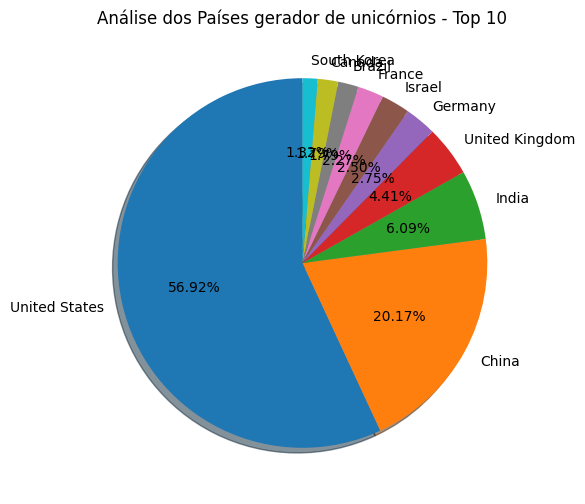

In [ ]:
#Plot geral dos Países
plt.figure( figsize=(15,6))
plt.title('Análise dos Países gerador de unicórnios - Top 10')
plt.pie(Analise.head(10),
        labels = Analise.index[0:10],
        shadow=True,
        startangle=90,
        autopct='%1.2f%%');

In [ ]:
#Conversão para Data
Base_Dados['Data de Adesão'] =pd.to_datetime(Base_Dados['Data de Adesão'])
Base_Dados['Data de Adesão'].head()

,Data de Adesão
0,2017-04-07
1,2012-12-01
2,2014-01-23
3,2011-12-12
4,2018-01-08


In [ ]:
#Extrair Ano e Mês
Base_Dados['Mês'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year
Base_Dados.head()

,id,Empresa,Valor ($B),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
#Tabela Analítica
Analise_Agrupada=Base_Dados.groupby(by=['País','Ano','Mês','Empresa']).count()['id'].reset_index()

In [ ]:
Analise_Agrupada.loc[
    Analise_Agrupada['País']=='Brazil'
]

,País,Ano,Mês,Empresa,id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [ ]:
#Retirando $ das linhas da coluna valor
#Base_Dados['Valor ($B)'] = pd.to_numeric(Base_Dados['Valor ($B)'].apply(lambda Linha: Linha.replace('$', '')))
Base_Dados.head()

,id,Empresa,Valor ($B),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
País_Analise = Base_Dados.groupby(by=['País'])['Valor ($B)'].sum().reset_index()

In [ ]:
Analise_Valor = País_Analise.sort_values('Valor ($B)',ascending=False)
Analise_Valor.head()

,País,Valor ($B)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


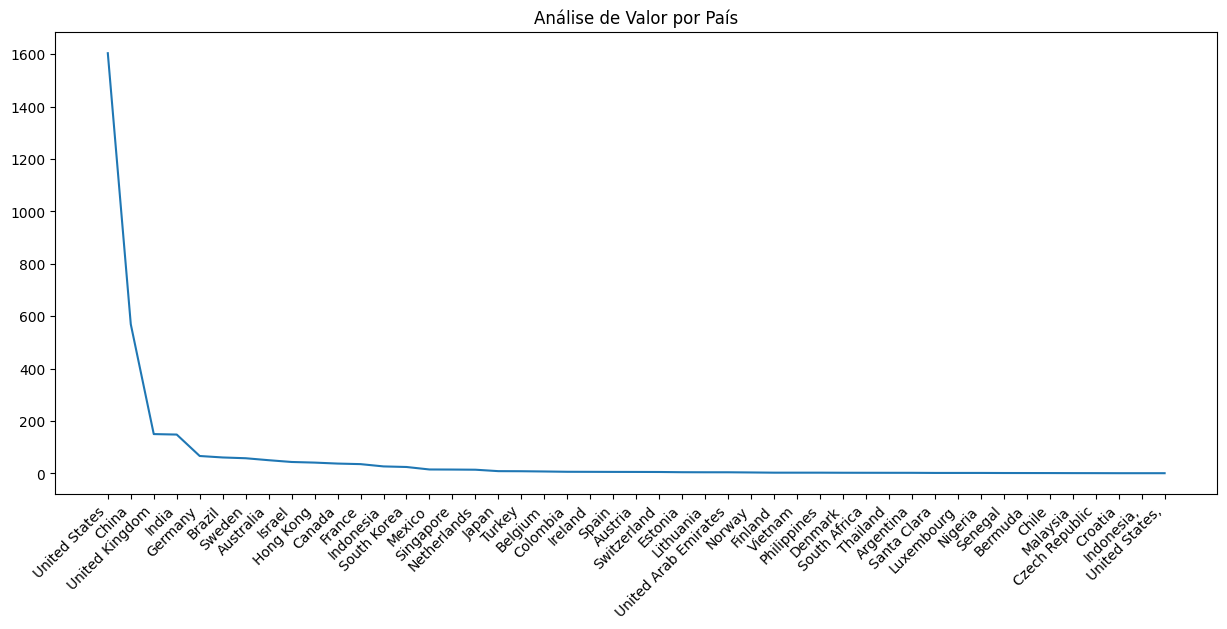

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(Analise_Valor['País'],Analise_Valor['Valor ($B)'])
plt.title('Análise de Valor por País')
plt.xticks(rotation = 45, ha='right');